In [2]:
!pip install turicreate

    100% |████████████████████████████████| 16.0MB 77kB/s 
    100% |████████████████████████████████| 3.4MB 357kB/s 
    100% |████████████████████████████████| 11.4MB 106kB/s 
  Running setup.py bdist_wheel for turicreate ... - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/6f/fe/b9/c7b2183ff515803f0698d927fff306064088f573a3eeb04305
  Running setup.py bdist_wheel for prettytable ... - done
  Stored in directory: /content/.cache/pip/wheels/b6/90/7b/1c22b89217d0eba6d5f406e562365ebee804f0d4595b2bdbcd
Successfully built turicreate prettytable
  Found existing installation: six 1.11.0
    Uninstalling six-1.11.0:
      Successfully uninstalled six-1.11.0


In [0]:
import turicreate as tc

In [0]:
import os
os.chdir("drive/demo-colab/demo-python-image-classification/")

In [0]:
img_folder = 'image'

In [10]:
data = tc.image_analysis.load_images(img_folder, with_path=True)

Read 14 images in 5.14675 secs	speed: 2.72017 file/sec

Read 28 images in 10.3996 secs	speed: 2.66524 file/sec

Read 39 images in 15.444 secs	speed: 2.18061 file/sec

Read 53 images in 20.5147 secs	speed: 2.76096 file/sec

Read 66 images in 25.5444 secs	speed: 2.58465 file/sec

Read 82 images in 30.8536 secs	speed: 3.01363 file/sec

Read 97 images in 36.0063 secs	speed: 2.91112 file/sec

Read 110 images in 41.2702 secs	speed: 2.46962 file/sec

Read 125 images in 46.5637 secs	speed: 2.83371 file/sec

Read 139 images in 51.7679 secs	speed: 2.69009 file/sec

Read 154 images in 57.2336 secs	speed: 2.74442 file/sec

Read 169 images in 62.4009 secs	speed: 2.90287 file/sec

Read 181 images in 67.4385 secs	speed: 2.38205 file/sec

Read 194 images in 72.4987 secs	speed: 2.56911 file/sec

In [11]:
data

path,image
/content/drive/demo-colab/demo-python-image-cl ...,Height: 450 Width: 800
/content/drive/demo-colab/demo-python-image-cl ...,Height: 330 Width: 255
/content/drive/demo-colab/demo-python-image-cl ...,Height: 233 Width: 216
/content/drive/demo-colab/demo-python-image-cl ...,Height: 180 Width: 320
/content/drive/demo-colab/demo-python-image-cl ...,Height: 169 Width: 299
/content/drive/demo-colab/demo-python-image-cl ...,Height: 480 Width: 640
/content/drive/demo-colab/demo-python-image-cl ...,Height: 1064 Width: 600
/content/drive/demo-colab/demo-python-image-cl ...,Height: 322 Width: 268
/content/drive/demo-colab/demo-python-image-cl ...,Height: 201 Width: 251
/content/drive/demo-colab/demo-python-image-cl ...,Height: 1426 Width: 1000


In [0]:
data['label'] = data['path'].apply(lambda path: 'doraemon' if 'doraemon' in path else 'walle')

In [13]:
data

path,image,label
/content/drive/demo-colab/demo-python-image-cl ...,Height: 450 Width: 800,walle
/content/drive/demo-colab/demo-python-image-cl ...,Height: 330 Width: 255,walle
/content/drive/demo-colab/demo-python-image-cl ...,Height: 233 Width: 216,walle
/content/drive/demo-colab/demo-python-image-cl ...,Height: 180 Width: 320,walle
/content/drive/demo-colab/demo-python-image-cl ...,Height: 169 Width: 299,doraemon
/content/drive/demo-colab/demo-python-image-cl ...,Height: 480 Width: 640,doraemon
/content/drive/demo-colab/demo-python-image-cl ...,Height: 1064 Width: 600,doraemon
/content/drive/demo-colab/demo-python-image-cl ...,Height: 322 Width: 268,doraemon
/content/drive/demo-colab/demo-python-image-cl ...,Height: 201 Width: 251,doraemon
/content/drive/demo-colab/demo-python-image-cl ...,Height: 1426 Width: 1000,walle


In [0]:
data.save('doraemon-walle.sframe')

In [15]:
data.explore()

NotImplementedError: ignored

In [0]:
train_data, test_data = data.random_split(0.8, seed=2)

In [17]:
model = tc.image_classifier.create(train_data, target='label')

Download completed: /var/tmp/model_cache/resnet-50-symbol.json
Download completed: /var/tmp/model_cache/resnet-50-0000.params
Resizing images...
Performing feature extraction on resized images...
Completed 168/168
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

WARNING: Detected extremely low variance for feature(s) '__image_features__' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 155

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 2048

Number of coefficients    : 2049

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.006452  | 1.046401     | 0.974194          | 1.000000            |

| 2         | 5        | 1.000000  | 1.081928     | 0.980645          | 1.000000            |

| 3         | 6        | 1.000000  | 1.102996     | 0.980645          | 1.000000            |

| 4         | 7        | 1.000000  | 1.125874     | 0.993548          | 1.000000            |

| 5         | 8        | 1.000000  | 1.146751     | 0.987097          | 1.000000            |

| 6         | 10       | 1.000000  | 1.177080     | 0.993548          | 1.000000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [0]:
predictions = model.predict(test_data)

In [19]:
metrics = model.evaluate(test_data)
print(metrics['accuracy'])

0.967741935484


In [20]:
predictions

dtype: str
Rows: 31
['walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'doraemon', 'walle', 'doraemon', 'doraemon', 'walle', 'walle', 'doraemon', 'doraemon', 'walle', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'walle', 'walle', 'doraemon', 'doraemon', 'doraemon', 'walle', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'walle']

In [21]:
test_data['label']

dtype: str
Rows: 31
['walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'walle', 'walle', 'doraemon', 'doraemon', 'walle', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'walle', 'walle', 'doraemon', 'doraemon', 'doraemon', 'walle', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'walle']

In [22]:
test_data[test_data['label'] != predictions]

path,image,label
/content/drive/demo-colab/demo-python-image-cl ...,Height: 400 Width: 640,doraemon


In [0]:
wrong_pred_img_path = test_data[predictions != test_data['label']][0]['path']

In [0]:
%matplotlib inline

In [0]:
img = tc.Image(wrong_pred_img_path)

In [0]:
img.show()

In [28]:
wrong_pred_img_path

'/content/drive/demo-colab/demo-python-image-classification/image/doraemon/image-020.jpg'

In [0]:
tc.Image('image/doraemon/image-020.jpg').show()

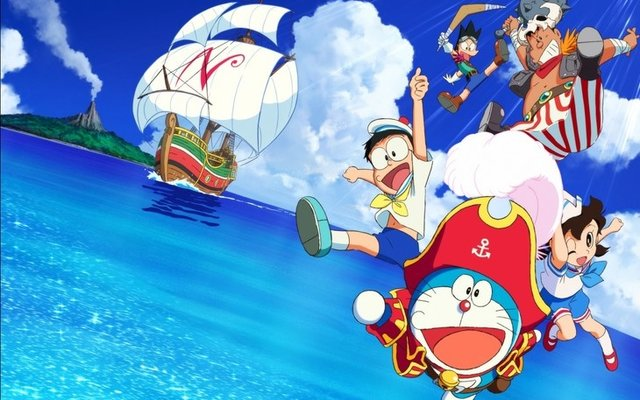

In [31]:
from IPython.display import Image
Image(filename='image/doraemon/image-020.jpg') 